<a href="https://colab.research.google.com/github/ramrod505/team-1-project/blob/BlackSoulDad-patch-2/WaterConsumptionPerNMRGCounty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3247078225.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Total Water Usage (Mgal/d)'] = df[water_usage_columns].sum(axis=1)
/tmp/ipython-input-3247078225.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['gallons use of water per day per person'] = (df['Total Water Usage (Mgal/d)'] * 1_000_000) / (df[population_column_name] * 1000)


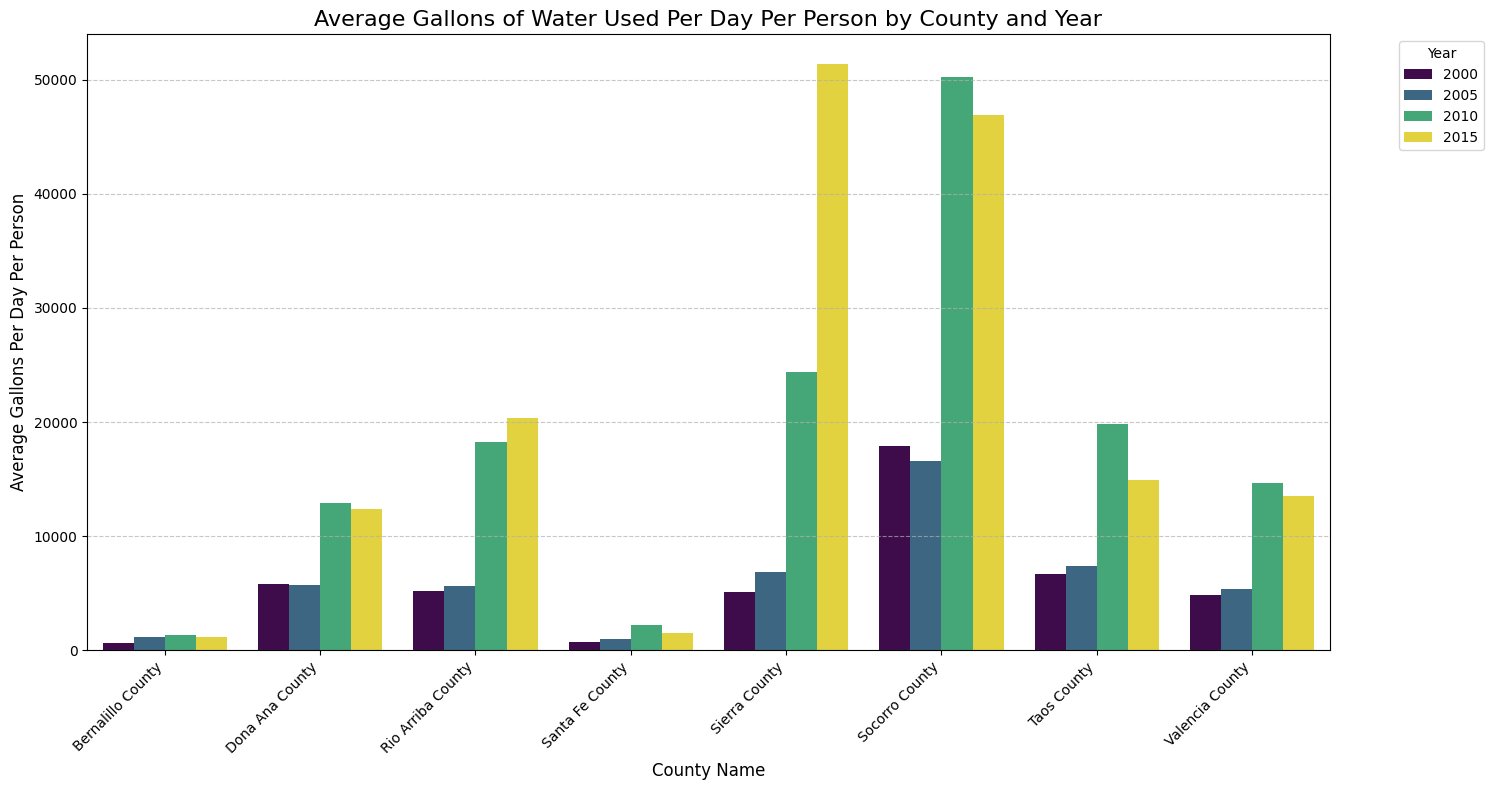

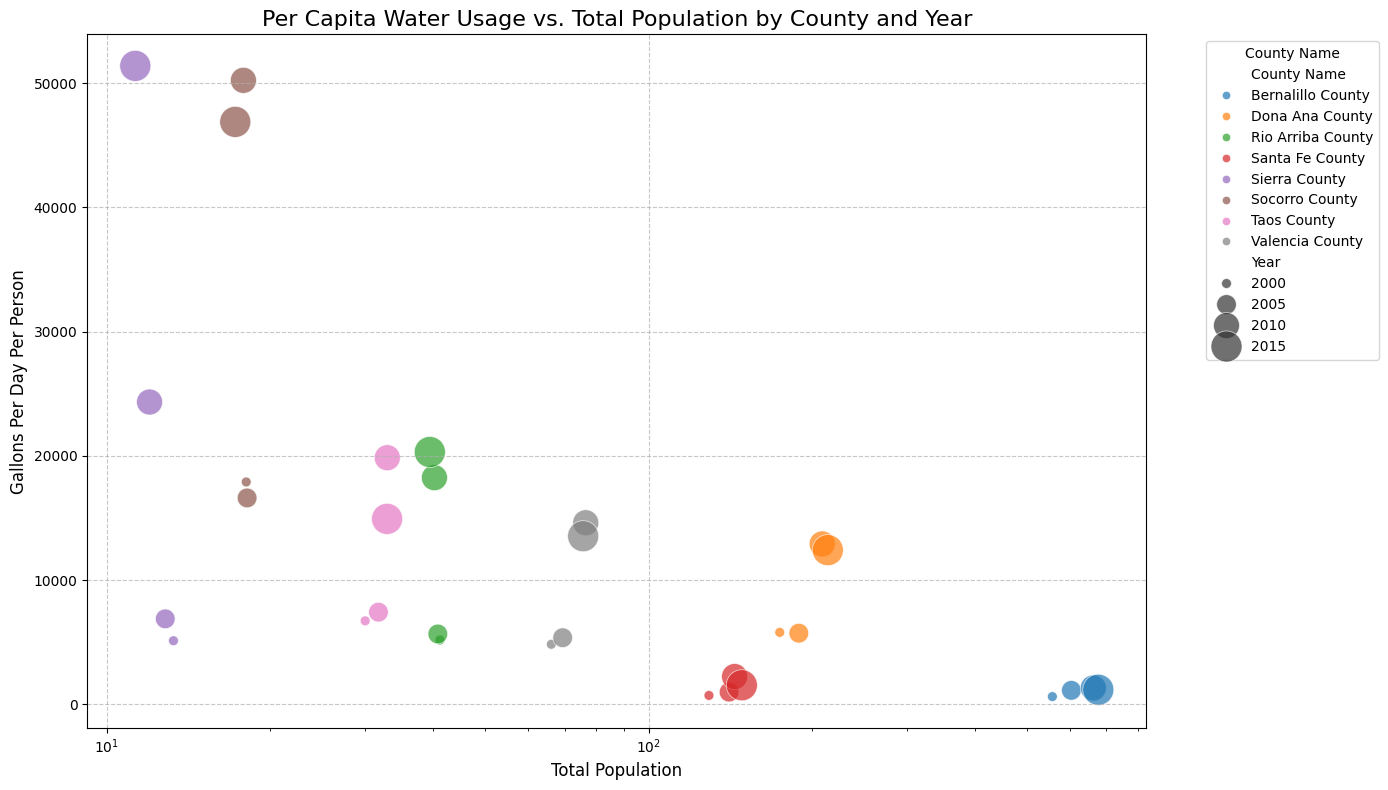

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('/content/ENG 220 Water Consumption Data Unfiltered - Copy.csv')

# Replace blank cells and cells containing only dashes with NaN
# Using regex to match one or more dashes or empty strings
df.replace(r'^(-|\s*)$', pd.NA, regex=True, inplace=True)

# Fill NaN values with 0
df.fillna(0, inplace=True)

# Save the cleaned DataFrame to a new CSV file
output_filename = 'ENG 220 cleaned data NMCRG.csv'
df.to_csv(output_filename, index=False)

water_usage_columns = [col for col in df.columns if 'Mgal/d' in col]

for col in water_usage_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Total Water Usage (Mgal/d)'] = df[water_usage_columns].sum(axis=1)

population_column_name = 'Total Population total population of area, in thousands'
df['gallons use of water per day per person'] = (df['Total Water Usage (Mgal/d)'] * 1_000_000) / (df[population_column_name] * 1000)

avg_per_capita_water_use = df.groupby(['County Name', 'Year'])['gallons use of water per day per person'].mean().reset_index()

# Create a figure and a set of subplots
plt.figure(figsize=(15, 8))

# Create the bar plot using the avg_per_capita_water_use DataFrame
sns.barplot(
    data=avg_per_capita_water_use,
    x='County Name',
    y='gallons use of water per day per person',
    hue='Year',
    palette='viridis'
)

# Add title and labels
plt.title('Average Gallons of Water Used Per Day Per Person by County and Year', fontsize=16)
plt.xlabel('County Name', fontsize=12)
plt.ylabel('Average Gallons Per Day Per Person', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# Create a scatter plot to compare per capita usage with total population
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df,
    x='Total Population total population of area, in thousands',
    y='gallons use of water per day per person',
    hue='County Name',
    size='Year', # Use year to show potential evolution
    sizes=(50, 500), # Range of marker sizes
    alpha=0.7,
    palette='tab10'
)

# Add title and labels
plt.title('Per Capita Water Usage vs. Total Population by County and Year', fontsize=16)
plt.xlabel('Total Population', fontsize=12)
plt.ylabel('Gallons Per Day Per Person', fontsize=12)
plt.xscale('log') # Use log scale for population if there's a wide range
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='County Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()